In [485]:
import numpy as np
import pandas as pd
from datetime import date, time, datetime, timedelta 
from dateutil import parser
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import random
import timeit

import warnings
warnings.filterwarnings("ignore")

In [486]:
mydateparser = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
testboston=pd.read_csv("Boston/boston_2015.csv", parse_dates=['start_time', "end_time"], date_parser=mydateparser)

In [487]:
testboston 

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2015-01-01 00:21:44,2015-01-01 00:30:47,115,96,Porter Square Station,Cambridge Main Library at Broadway / Trowbridg...,277,Subscriber
1,2015-01-01 00:27:03,2015-01-01 00:34:21,80,95,MIT Stata Center at Vassar St / Main St,Cambridge St - at Columbia St / Webster Ave,648,Subscriber
2,2015-01-01 00:31:31,2015-01-01 00:35:46,91,68,One Kendall Square at Hampshire St / Portland St,Central Square at Mass Ave / Essex St,555,Subscriber
3,2015-01-01 00:53:46,2015-01-01 01:00:58,115,96,Porter Square Station,Cambridge Main Library at Broadway / Trowbridg...,1307,Subscriber
4,2015-01-01 01:07:06,2015-01-01 01:19:21,105,88,Lower Cambridgeport at Magazine St/Riverside Rd,Inman Square at Vellucci Plaza / Hampshire St,177,Customer
...,...,...,...,...,...,...,...,...
1122553,2015-12-31 23:35:04,2015-12-31 23:43:15,73,88,Harvard Square at Brattle St / Eliot St,Inman Square at Vellucci Plaza / Hampshire St,1473,Subscriber
1122554,2015-12-31 23:37:29,2015-12-31 23:47:36,135,43,ID Building East,Rowes Wharf - Atlantic Ave,649,Subscriber
1122555,2015-12-31 23:38:16,2015-12-31 23:47:26,135,43,ID Building East,Rowes Wharf - Atlantic Ave,1552,Subscriber
1122556,2015-12-31 23:46:04,2015-12-31 23:48:04,36,36,Boston Public Library - 700 Boylston St.,Boston Public Library - 700 Boylston St.,1083,Customer


In [518]:
#creating column 'Duration'
testboston["Duration"]=testboston["end_time"]-testboston["start_time"]


In [520]:
x= timedelta(days= 0)
testboston[testboston["Duration"]<x]


,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,Duration,Weekday,season
984979,2015-11-01 01:44:08,2015-11-01 01:08:25,8,76,Union Square - Brighton Ave. at Cambridge St.,Central Sq Post Office / Cambridge City Hall a...,1447,Subscriber,-1 days +23:24:17,6,4
984980,2015-11-01 01:47:16,2015-11-01 01:03:13,88,74,Inman Square at Vellucci Plaza / Hampshire St,Harvard Square at Mass Ave/ Dunster,865,Subscriber,-1 days +23:15:57,6,4
984981,2015-11-01 01:48:11,2015-11-01 01:13:02,57,132,Columbus Ave. at Mass. Ave.,Summer St at Cutter St,383,Subscriber,-1 days +23:24:51,6,4
984985,2015-11-01 01:50:17,2015-11-01 01:32:53,121,13,West Broadway at Dorchester St,Boston Medical Center - East Concord at Harri...,196,Subscriber,-1 days +23:42:36,6,4
984986,2015-11-01 01:50:36,2015-11-01 01:28:45,121,13,West Broadway at Dorchester St,Boston Medical Center - East Concord at Harri...,1371,Subscriber,-1 days +23:38:09,6,4
984987,2015-11-01 01:51:24,2015-11-01 01:03:22,161,20,West Broadway at D Street,Aquarium Station - 200 Atlantic Ave.,1019,Customer,-1 days +23:11:58,6,4
984988,2015-11-01 01:52:19,2015-11-01 01:03:00,88,74,Inman Square at Vellucci Plaza / Hampshire St,Harvard Square at Mass Ave/ Dunster,846,Subscriber,-1 days +23:10:41,6,4
984989,2015-11-01 01:53:11,2015-11-01 01:13:00,45,113,Yawkey Way at Boylston St.,Andrew Station - Dorchester Ave at Humboldt Pl,1503,Subscriber,-1 days +23:19:49,6,4
984990,2015-11-01 01:55:10,2015-11-01 01:06:18,33,67,Kenmore Sq / Comm Ave,MIT at Mass Ave / Amherst St,1376,Customer,-1 days +23:11:08,6,4
984991,2015-11-01 01:55:13,2015-11-01 01:07:03,45,4,Yawkey Way at Boylston St.,Tremont St. at Berkeley St.,369,Customer,-1 days +23:11:50,6,4


In [489]:
indx = testboston[testboston["end_time"]<testboston["start_time"]].index
testboston['Duration'][indx] = pd.Timedelta('0 days 00:00:00')

We noticed that the rows between the start_time 2015-11-01 01:44:08 and 2015-11-01 01:59:47 have end_time's that are smaller than the start_time in each row. So we assumed that most likely a error has occured. So we decided to set their duriation to 0 so it dosen't interfere with the other data without losing information.

In [490]:
testboston = testboston.drop(testboston.index[21566])
testboston

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,Duration
0,2015-01-01 00:21:44,2015-01-01 00:30:47,115,96,Porter Square Station,Cambridge Main Library at Broadway / Trowbridg...,277,Subscriber,0 days 00:09:03
1,2015-01-01 00:27:03,2015-01-01 00:34:21,80,95,MIT Stata Center at Vassar St / Main St,Cambridge St - at Columbia St / Webster Ave,648,Subscriber,0 days 00:07:18
2,2015-01-01 00:31:31,2015-01-01 00:35:46,91,68,One Kendall Square at Hampshire St / Portland St,Central Square at Mass Ave / Essex St,555,Subscriber,0 days 00:04:15
3,2015-01-01 00:53:46,2015-01-01 01:00:58,115,96,Porter Square Station,Cambridge Main Library at Broadway / Trowbridg...,1307,Subscriber,0 days 00:07:12
4,2015-01-01 01:07:06,2015-01-01 01:19:21,105,88,Lower Cambridgeport at Magazine St/Riverside Rd,Inman Square at Vellucci Plaza / Hampshire St,177,Customer,0 days 00:12:15
...,...,...,...,...,...,...,...,...,...
1122553,2015-12-31 23:35:04,2015-12-31 23:43:15,73,88,Harvard Square at Brattle St / Eliot St,Inman Square at Vellucci Plaza / Hampshire St,1473,Subscriber,0 days 00:08:11
1122554,2015-12-31 23:37:29,2015-12-31 23:47:36,135,43,ID Building East,Rowes Wharf - Atlantic Ave,649,Subscriber,0 days 00:10:07
1122555,2015-12-31 23:38:16,2015-12-31 23:47:26,135,43,ID Building East,Rowes Wharf - Atlantic Ave,1552,Subscriber,0 days 00:09:10
1122556,2015-12-31 23:46:04,2015-12-31 23:48:04,36,36,Boston Public Library - 700 Boylston St.,Boston Public Library - 700 Boylston St.,1083,Customer,0 days 00:02:00


We dropped the row with index 21566 , because it has no end_time. A possible reason could be, that it was stolen or broke while using it.

In [491]:
testboston['end_station_id'] = testboston['end_station_id'].astype(int)

In [494]:
def get_weekday (ts):
    return ts.weekday()
#0=Monday 6=Sunday
testboston["Weekday"]=testboston["start_time"].apply(lambda x:get_weekday(x))


In [495]:
#is weekend or not
workweek =testboston[testboston['Weekday']<5]
weekend = testboston[testboston['Weekday']>4]


In [496]:
seasons = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
month_to_season = {}
for k in range(1, 13):
    month_to_season[k]= seasons[k-1]
month_to_season
# 1= winter , 2= spring , 3= summer , 4= fall



{1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 4, 10: 4, 11: 4, 12: 1}

In [497]:
testboston = testboston.assign(season=lambda x: x["start_time"].apply(lambda s: month_to_season[s.month]))

In [498]:
# create dataframe for each season
spring = testboston[testboston['season']==2]
summer = testboston[testboston['season']==3]
autumn = testboston[testboston['season']==4]
winter = testboston[testboston['season']==1]



In [499]:
# creating function to plot any dictionary
def plotting(dict0):
    plt.bar(range(len(dict0)), list(dict0.values()), align='center')
    plt.xticks(range(len(dict0)), list(dict0.keys()))
    plt.show()

In [501]:
def demand_hour(df):
    dict_dem={}
    for i in range(24):
        dict_dem[i]=0
    dict_dem

    time = pd.Series(dict_dem)
    for x in range(len(df)):
        if x==21566:
            x=x+1
        akt=testboston["start_time"][x]
        dict_dem[akt.hour]=(dict_dem[akt.hour])+1
    print(dict_dem)
    return dict_dem

We have created a function to calculate the demand of bikes at each hour of the day, by counting how many instances have there start_time in the same hour. The count is stored in a dictionary.

{0: 8982, 1: 5534, 2: 3472, 3: 1130, 4: 1146, 5: 5958, 6: 24262, 7: 64556, 8: 101336, 9: 60969, 10: 45736, 11: 51147, 12: 60862, 13: 61518, 14: 60746, 15: 67625, 16: 95211, 17: 129992, 18: 93847, 19: 64928, 20: 43517, 21: 31338, 22: 23592, 23: 15153}


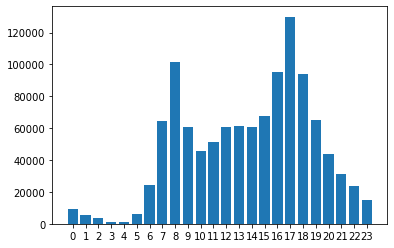

In [502]:
plotting(demand_hour(testboston))

In [525]:
#usage_perHour_allyear
def per_hour(dataframe):
    dict_df = {}

    for i in range(0, 24):
        dict_df[i] = 0

    for i in range(0, len(dataframe)):
        if i == 21566:
            i = i+1
        if dataframe['Duration'][i].total_seconds() >= 0 : 
            k = dataframe['Duration'][i].total_seconds()
            k = int(k/3600)
            for j in range(k):
                dict_df[(dataframe['start_time'][i].hour+k)%24] +=1
        
        #for j in range(dataframe["start_time"][i].hour,dataframe["end_time"][i].hour ): #+1
           # dict_df[j] += 1
    #print(dict_df)
    return dict_df

The code above calculates the usage. Diffrent to the demand function it also computes how long a bike is beeing rented, thus giving us information when most bikes are in use and unavailable.

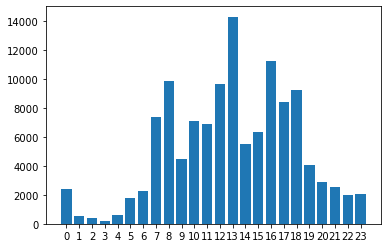

In [524]:
plotting(per_hour(testboston))

{0: 7126, 1: 4322, 2: 2730, 3: 900, 4: 945, 5: 4771, 6: 18821, 7: 48838, 8: 75102, 9: 45496, 10: 34728, 11: 38952, 12: 46713, 13: 47007, 14: 46358, 15: 51832, 16: 73571, 17: 101720, 18: 74862, 19: 52467, 20: 34972, 21: 25043, 22: 19066, 23: 12208}


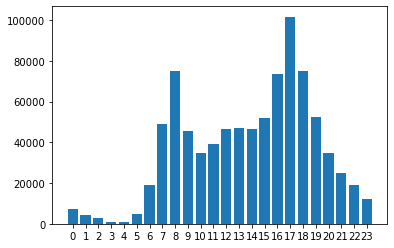

{0: 2016, 1: 1359, 2: 855, 3: 277, 4: 255, 5: 1194, 6: 4900, 7: 13443, 8: 21288, 9: 14074, 10: 10947, 11: 12455, 12: 14589, 13: 14603, 14: 14672, 15: 15604, 16: 21633, 17: 29187, 18: 21591, 19: 14739, 20: 9405, 21: 6680, 22: 5083, 23: 3158}


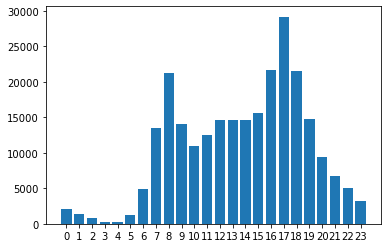

In [526]:
plotting(demand_hour(workweek))
plotting(demand_hour(weekend))

The two bar charts above show te demand per hour during the work-week and the weekend. The distribution seem very similar, but looking at the number of rented bikes it can be observed that there is way more demand during the work-week. As an an example at 17 o'clock 101720 customers rented a bike compared to just 29187 customers on the weekend.     

{0: 3951, 1: 2502, 2: 1549, 3: 485, 4: 502, 5: 2533, 6: 10006, 7: 25769, 8: 40250, 9: 25310, 10: 19278, 11: 22020, 12: 25971, 13: 26262, 14: 26259, 15: 29319, 16: 40795, 17: 55929, 18: 41121, 19: 29229, 20: 19618, 21: 13741, 22: 10372, 23: 6847}


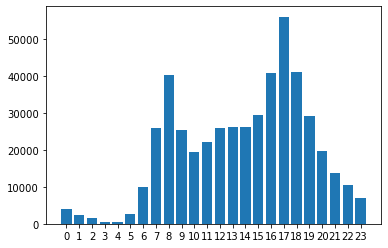

{0: 516, 1: 336, 2: 215, 3: 76, 4: 55, 5: 212, 6: 875, 7: 2607, 8: 5407, 9: 4164, 10: 3177, 11: 3219, 12: 3637, 13: 3520, 14: 3709, 15: 3601, 16: 4888, 17: 6351, 18: 5095, 19: 3425, 20: 2127, 21: 1597, 22: 1221, 23: 746}


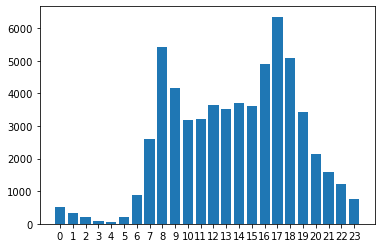

In [522]:
plotting(demand_hour(summer))
plotting(demand_hour(winter))

Similar to the way the demand differs between work-week and weekend, so is the biggest diffrence between the periods summer and winter not the distribution, but the amount of total customers. Still it can be observed that during winter the demand at both peak times, 8 and 17 o'clock, are close to each other than during summer.

In [527]:
#dem_perWeekday_allyear
def dem_perweek(dataframe):
    dict_df1 = {}
    for i in range(0, 7):
        dict_df1[i] = 0
   
    for x in range(len(dataframe)):
        if x == 21566:
             x=x+1
        b = dataframe['start_time'][x].dayofweek
        dict_df1[b] = (dict_df1[b])+1
    return dict_df1
             

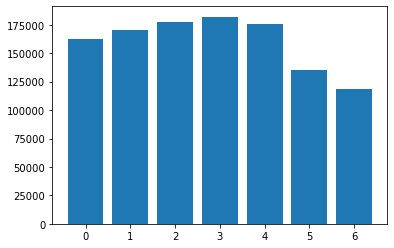

In [528]:
plotting(dem_perweek(testboston))

Here we made a plot to see more clearly how the demand varies during each day of the week. There seems to be a slight increase from Monday to Thursday, afterwards at Saturday and Sunday there is a obvious drop in demand.  

In [509]:
#usage_perWeekday_allyear
def use_perweek(df):
    dict_df1 = {}
    for i in range(0, 7):
        dict_df1[i] = 0

    for i in range(0, len(df)):
        if i == 21566:
            continue
        for j in range(df['start_time'][i].dayofweek, df['end_time'][i].dayofweek +1  ):
                dict_df1[j] += 1
    return dict_df1 


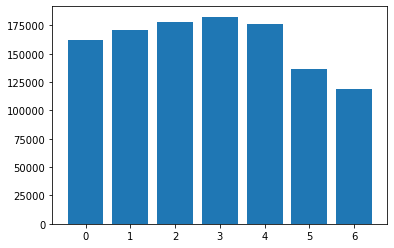

In [510]:
plotting(use_perweek(testboston))

Similar to the plot before, we wanted to see how the usage changes over the coures of a week. If the plots aren't much alike it could indicate that e.g less people rent bikes on weekend but for longer periods. However the results are not much diffrent that the results for demand. 